# Fraud Detection - Credit Card Transactions

Dataset from [Kartik Shenoy](https://www.kaggle.com/datasets/kartik2112/fraud-detection/data)

When we try to analyse a dataset where a category, in this case; "fraud" and "not fraud", have a highly different proportion, we don't have enough examples to make a good prediction. We face a **inbalanced dataset**. <br>
Some ways to improve our predictions could be:
- Model Parameter Adjustment
- Modify Dataset
- Artificial samples
- Balanced Ensemble Methodsion
<br>

If we evaluate the effectiveness of our model based solely on the accuracy of the majority class, we may be deceiving ourselves into believing that the model is working correctly. Although it is commonly used, classification accuracy is generally unsuitable for imbalanced dataset. This is because a model with no skill that only predicts the majority class can achieve high accuracy (or low error). <br>
**Classification accuracy** is a metric that encapsulates the performance of a classification model by calculating the ratio of correct predictions to the total number of predictions.<br>
We'll use a **Confusion Matrix** for a binary (two-class) classification problem. The confusion matrix offers deeper insights into the performance of a predictive model, revealing which classes are predicted accurately, which are not, and the types of errors occurring.

![title](images/visualization1.jpg)

The **accuracy** of the model is basically the total number of correct predictions divided by the total number of predictions.<br>
The **sensitivity** refers to the true positive rate and summarizes how well the positive class was predicted.<br>
The **specificity** is the complement to sensitivity, or the true negative rate, and summarises how well the negative class was predicted. <br>
The **precision** of a class defines how reliable a model is in answering whether a point belongs to that class.<br>
The **recall** of a class expresses how well the model can detect that class.<br>
<br>
There are four possible cases:
- **High precision and high recall**: the model handles that class perfectly
- **High precision and low recall**: the model does not detect the class very well, but when it does it is highly reliable.
- **Low precision and high recall**: The class detects the class well but also includes samples from other classes.
- **Low precision and low recall**: The model fails to classify the class correctly.

Some of the most common metric for desbalanced datasets:
- **F1-Score**: represents both precision and recall in one metric.
- **AUC Score**: a popular metric to evaluate the performance of binary classifiers.
- **Average Precision Score (AP)**: summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold.
- **G-Mean**: a metric that measures the balance between classification performances on both the majority and minority classes.

### Import Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

### Load Dataset

In [11]:
raw_df = pd.read_csv('input/creditcardfraud.csv')

In [12]:
#raw_df.shape #(1296675, 23)
raw_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [14]:
raw_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


### Imbalanced Data

In [16]:
isFraud = raw_df['is_fraud'].value_counts()
isFraud

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

**Visual representation for simple interpretation**

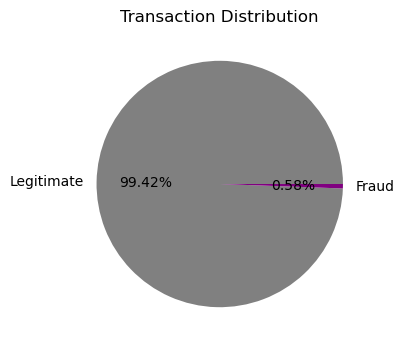

In [18]:
labels = ['Legitimate', 'Fraud']
data = isFraud.tolist()

fig = plt.figure(figsize=(4, 4))
plt.pie(data, labels=labels, autopct='%.2f%%', colors=['grey', 'purple'])
plt.title('Transaction Distribution')
plt.show()

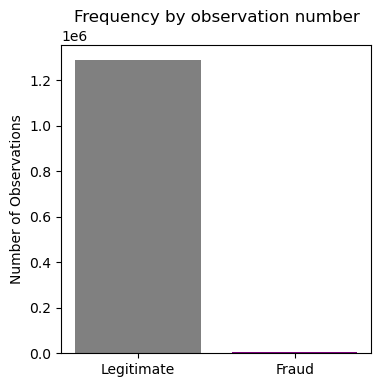

In [19]:
labels = ['Legitimate', 'Fraud']
data = isFraud.tolist()

fig = plt.figure(figsize=(4, 4))
plt.bar(labels, data, color = ['grey', 'purple'])
plt.title("Frequency by observation number")
plt.ylabel("Number of Observations")
plt.show()

In [20]:
#Save dataset for legitimate and fraud
legitimate_df = raw_df[raw_df.is_fraud == 0]
fraud_df = raw_df[raw_df.is_fraud == 1]

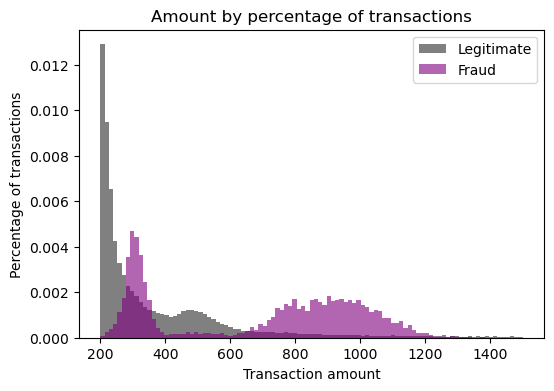

In [21]:
bins = np.linspace(200, 1500, 100)

fig = plt.figure(figsize=(6, 4))
plt.hist(legitimate_df['amt'], bins, alpha=1, density=True, label='Legitimate', color='grey')
plt.hist(fraud_df['amt'], bins, alpha=0.6, density=True, label='Fraud', color='purple')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions")
plt.xlabel("Transaction amount")
plt.ylabel("Percentage of transactions")
plt.show()

We can see a clear trend of increasing transaction amounts. Legitimate transactions exhibit an inverse relationship between quantity and amount: most transactions are of low amounts. However, we can observe that while most fraudulent transactions initially try to mimic this pattern, they soon tend to be for higher amounts.

## Data Preparation

In [24]:
df = raw_df.copy()
df.drop_duplicates(inplace=True)

In [25]:
#df.info()

In [26]:
to_drop = ['Unnamed: 0',
           'trans_date_trans_time',
           'first',
           'last',
           'gender',
           'street',
           'city',
           'state',
           'zip',
           'city_pop',
           'dob']
df.drop(to_drop, inplace=True, axis=1)
df.head()

,cc_num,merchant,category,amt,lat,long,job,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,36.0788,-81.1781,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,48.8878,-118.2105,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,42.1808,-112.2620,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,46.2306,-112.1138,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,38.4207,-79.4629,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [27]:
encoder = LabelEncoder()
df["merchant"] = encoder.fit_transform(df["merchant"])
df["category"] = encoder.fit_transform(df["category"])
df["job"] = encoder.fit_transform(df["job"])
df["trans_num"] = encoder.fit_transform(df["trans_num"])

In [28]:
#df.info()
#df

### Train test split

The [**train_test_split**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from the scikit-learn library in Python is used to split a dataset into two subsets: one for training and one for testing.
It allows you to evaluate how well a model generalizes to unseen data, if a model is overfitting the training data, facilitates the comparison of different models or configurations of the same model under the same conditions.

In [31]:
y = df['is_fraud']
X = df.drop('is_fraud', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

### Standarize data

The **[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)** function transforms the data so that it has a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of each feature and dividing by the standard deviation. Standardization is important because many machine learning algorithms, especially gradient-based ones, perform better when features have similar scales.

In [34]:
def standard_scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [35]:
col_names = ['amt']
X_train = standard_scaler (X_train, col_names)
X_test = standard_scaler (X_test, col_names)

## Data Sampling and Balancing Strategies

### Unbalanced model

In [38]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"\n Accuracy: {accuracy}")
print(f" Precision: {precision}")
print(f" Recall: {recall}")
print(f" F1 Score: {f1}")

# Confusion Matrix
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


 Accuracy: 0.996622134019532
 Precision: 0.8369188063844553
 Recall: 0.5277899343544857
 F1 Score: 0.6473429951690821

 Confusion Matrix:
[[386483    235]
 [  1079   1206]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386718
           1       0.84      0.53      0.65      2285

    accuracy                           1.00    389003
   macro avg       0.92      0.76      0.82    389003
weighted avg       1.00      1.00      1.00    389003



In [94]:
ndf = [(recall, precision, f1, accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Random Forest with', 'No Under/Oversampling')
rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.594748,0.795202,0.680521,0.99672


In sum, a recall of 0.52779 indicates that our model is correctly identifying approximately 52.78% of all positive instances in our data set. As we can see, these results are very far from what was expected and we are going to have to consider tuning our model or exploring different preprocessing and sampling techniques for better results.

### Random Oversampling

In [74]:
ros =  RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

Distribution of class labels before resampling Counter({0: 902451, 1: 5221})
Distribution of class labels after resampling Counter({0: 902451, 1: 451225})


In [78]:
clf = RandomForestClassifier()
clf.fit(X_train_res, y_train_res)
y_pred = clf.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"\n Accuracy: {accuracy}")
print(f" Precision: {precision}")
print(f" Recall: {recall}")
print(f" F1 Score: {f1}")

# Confusion Matrix
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


 Accuracy: 0.9967198196414938
 Precision: 0.7952018724400234
 Recall: 0.5947483588621444
 F1 Score: 0.6805207811717576

 Confusion Matrix:
[[386368    350]
 [   926   1359]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386718
           1       0.80      0.59      0.68      2285

    accuracy                           1.00    389003
   macro avg       0.90      0.80      0.84    389003
weighted avg       1.00      1.00      1.00    389003

